In [17]:
import pywt
import ps_lib as ps
import scipy
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


img_path = "target-image.png"
img = ps.read_image(img_path)
print(img.shape)
LL, (LH, HL, HH) = pywt.dwt2(img, 'haar', axes = (0, 1))

img_recover = pywt.idwt2((LL, (LH, HL, HH)), 'haar', axes = (0, 1))

print(LL.shape, LH.shape, HL.shape, HH.shape)
# plt.imshow(img_recover)
# plt.show()
# plt.imshow(LL)
# plt.show()
# # Image recovered from the inverse idwt
# plt.imshow(img)
# plt.show()


(512, 512, 3)
(256, 256, 3) (256, 256, 3) (256, 256, 3) (256, 256, 3)


Quantizing Step

In [3]:




img_path = "target-image.png"
img = ps.read_image(img_path)

# Decompose the image into luminence, color channels
img = 255 * img

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
y  = .299 * R + .587*G + .114*B
# cb = 128 + .168736 * R -.331264 * G + .5 * B
# cr = 128 + .5 * R -.418688 * G - .081312*B

# new_img = np.dstack([y, cb, cr]) / 255 
new_img = np.dstack([R, G, B]) / 255 
print(np.max(new_img), np.min(new_img))

coeff = scipy.fftpack.dct(scipy.fftpack.dct(new_img, axis=0, norm='ortho'), axis=1, norm='ortho')
print(coeff.shape)

# quantizing the coefficients


1.0 0.0
(512, 512, 3)


In [4]:
import numpy as np

original_data = [154, 123, 123, 123, 123, 123, 123, 136, 192, 180, 136, 154, 154, 154, 136, 110, 254, 198, 154, 154, 180, 154, 123, 123, 239, 180, 136, 180, 180, 166, 123, 123, 180, 154, 136, 167, 166, 149, 136, 136, 128, 136, 123, 136, 154, 180, 198, 154, 123, 105, 110, 149, 136, 136, 180, 166, 110, 136, 123, 123, 123, 136, 154, 136]

original_data = np.array(original_data).reshape((8, 8))

T = [.3536, .3536, .3536, .3536, .3536, .3536, .3536, .3536, .4904, .4157, .2778, .0975, -.0975, -.2778, -.4157, -.4904, .4619, .1913, -.1913, -.4619, -.4619, -.1913, .1913, .4619, .4157, -.0975, -.4904, -.2778, .2778, .4904, .0975, -.4157, .3536, -.3536, -.3536, .3536, .3536, -.3536, -.3536, .3536, .2778, -.4904, .0975, .4157, -.4157, -.0975, .4904, -.2778, .1913, -.4619, .4619, -.1913, -.1913, .4619, -.4619, .1913, .0975, -.2778, .4157, -.4904, .4904, -.4157, .2778, -.0975]

T = np.reshape(T, (8,8))

M = [26, -5, -5, -5, -5, -5, -5, 8, 64, 52, 8, 26, 26, 26, 8, -18, 126, 70, 26, 26, 52, 26, -5, -5, 111, 52, 8, 52, 52, 38, -5, -5, 52, 26, 8, 39, 38, 21, 8, 8, 0, 8, -5, 8, 26, 52, 70, 26, -5, -23, -18, 21, 8, 8, 52, 38, -18, 8, -5, -5, -5, 8, 26, 8]
M = np.reshape(M, (8,8))
# matrix = np.array(data).reshape(8, 8) / 255

D = np.round(np.array(T @ M @ T.T), 1) 
print(D)


data = np.array(original_data).reshape((8, 8)) - 128


# Define quantization matrix for Qfactor of 50
q_mat=np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,103,99]])

c = np.round(np.array(D / q_mat)).astype(np.int8)
print(c)


[[162.3  40.6  20.   72.3  30.3  12.5 -19.7 -11.5]
 [ 30.5 108.4  10.5  32.3  27.7 -15.5  18.4  -2. ]
 [-94.1 -60.   12.3 -43.4 -31.3   6.1  -3.3   7.1]
 [-38.6 -83.4  -5.4 -22.2 -13.5  15.5  -1.3   3.5]
 [-31.3  17.9  -5.5 -12.4  14.3  -6.   11.5  -6. ]
 [ -0.9 -11.8  12.8   0.2  28.1  12.6   8.4   2.9]
 [  4.6  -2.4  12.2   6.6 -18.7 -12.8   7.7  12. ]
 [-10.   11.2   7.8 -16.3  21.5   0.    5.9  10.7]]
[[10  4  2  5  1  0  0  0]
 [ 3  9  1  2  1  0  0  0]
 [-7 -5  1 -2 -1  0  0  0]
 [-3 -5  0 -1  0  0  0  0]
 [-2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


# decompression


In [5]:
r = q_mat * c
N = np.round(T.T @ r @ T) + 128
print(N)

[[149. 134. 119. 116. 121. 126. 127. 128.]
 [204. 168. 140. 144. 155. 150. 135. 125.]
 [253. 195. 155. 166. 183. 165. 131. 111.]
 [245. 185. 148. 166. 184. 160. 124. 107.]
 [188. 149. 132. 155. 172. 159. 141. 136.]
 [132. 123. 125. 143. 160. 166. 168. 171.]
 [109. 119. 126. 128. 139. 158. 168. 166.]
 [111. 127. 127. 114. 118. 141. 147. 135.]]


# JPEG the image

In [6]:
img_path = "target-image.png"
img = ps.read_image(img_path)
print(img.shape)
# LL, (LH, HL, HH) = pywt.dwt2(img, 'haar', axes = (0, 1))

# img_recover = pywt.idwt2((LL, (LH, HL, HH)), 'haar', axes = (0, 1))

print(LL.shape)
# plt.imshow(img_recover)
# plt.show()

# plt.imshow(img)
# plt.show()
# plt.imshow(LH)
# plt.show()
# plt.imshow(LL)
# plt.show()
# plt.imshow(HH)
# plt.show()

(512, 512, 3)
(256, 256, 3)


# JPEG 2000 stuff

# Computing the DWT

In [7]:
H = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, -1, -1],
    [1, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, -1]
]).T


# H = np.array([])

# Normalize the matrix
norm = np.linalg.det(H)
# print(row_norms)
col_norms = np.linalg.norm(H, axis=0, keepdims=True)
# print(col_norms)
np.set_printoptions(precision=3, suppress=True)
print(H)
normalized_H = H / norm

# print(normalized_H)
row = data[0]
bruh = normalized_H @ np.array(row)
print(bruh)

# print(row)
# print(discrete_haar_wavelet_transform(row.copy()))
# print(row)
# print(row)

# approximation = np.array(two_dimensional_haar_wavelet_transform(y / 255))
# print(approximation)
# plt.imshow(approximation)
# plt.show()
# plt.imshow(y)
# plt.show()


[[ 1  1  1  0  1  0  0  0]
 [ 1  1  1  0 -1  0  0  0]
 [ 1  1 -1  0  0  1  0  0]
 [ 1  1 -1  0  0 -1  0  0]
 [ 1 -1  0  1  0  0  1  0]
 [ 1 -1  0  1  0  0 -1  0]
 [ 1 -1  0 -1  0  0  0  1]
 [ 1 -1  0 -1  0  0  0 -1]]
[0.086 0.164 0.164 0.242 0.164 0.242 0.344 0.219]


In [8]:
H = [[.5, .5, 0, 0, 0, 0, 0, 0], [.5, -.5, 0, 0, 0, 0, 0, 0], [0, 0, .5, .5, 0, 0, 0, 0], [0, 0, .5, -.5, 0, 0, 0, 0], [0, 0, 0, 0, .5, .5, 0, 0], [0, 0, 0, 0, .5, -.5, 0, 0], [0, 0, 0, 0, 0, 0, .5, .5], [0, 0, 0, 0, 0, 0, .5, -.5]]
H = np.reshape(H, (8, 8))
norm_factor = np.linalg.norm(H, axis=1)
H = H / norm_factor
print(H)


print(H @ row)
print(pywt.dwt(row, 'haar'))

[[ 0.707  0.707  0.     0.     0.     0.     0.     0.   ]
 [ 0.707 -0.707  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.707  0.707  0.     0.     0.     0.   ]
 [ 0.     0.     0.707 -0.707  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.707  0.707  0.     0.   ]
 [ 0.     0.     0.     0.     0.707 -0.707  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.707  0.707]
 [ 0.     0.     0.     0.     0.     0.     0.707 -0.707]]
[14.849 21.92  -7.071  0.    -7.071  0.     2.121 -9.192]
(array([14.849, -7.071, -7.071,  2.121]), array([21.92 ,  0.   ,  0.   , -9.192]))


In [9]:
H = np.array([[.5, .5, 0, 0], [.5, -.5, 0, 0], [0, 0, .5, .5], [0, 0, .5, -.5]])
print(H @ np.array([1, 3, 3, 4]) * np.sqrt(2))

[ 2.828 -1.414  4.95  -0.707]


In [10]:
print(pywt.dwt([1, 2], 'db1'))


(array([2.121]), array([-0.707]))


# 2D wavelet transform

In [11]:
def gen_harr_matrix(N: int):
    if N <= 1 or  (N & (N - 1)) != 0:
        print("N is not a multiple of 2 zodie")
        return
    
    harr = np.zeros((N, N))
    for i in range(0, N, 2):
        harr[i, i:i+2] = [1, 1]
        harr[i+1, i:i+2] = [1, -1]

    # normalizing the harr matrix so it's consistent with pwt
    return harr / np.linalg.norm(harr, axis=1)

def gen_harr_inverse(N: int):
    return np.linalg.inv(gen_harr_matrix(N))




In [12]:
zodie = np.random.randint(0, 100, size=(512, 512)) # np.array([[1,3, 1, 52], [1,3, 133, 2], [9,56, 32, 1], [1,30, 10, 57]])


def get_2d_wavelet_transform(data):
    H = gen_harr_matrix(len(data))

    row_stuff = H @ data

    # permute the rowwws

    cA_row, cD_row = row_stuff[::2, :], row_stuff[1::2, :]
    # print(cA, '\n\n',cD)
    col_stuff = H @ cA_row.T

    cA, cV = col_stuff[::2, :].T, col_stuff[1::2, :].T
    col_stuff2 = H @ cD_row.T


    cH, cD = col_stuff2[::2, :].T, col_stuff2[1::2, :].T


    # cA_pywt, (cH_pywt, cV_pywt, cD_pywt) = pywt.dwt2(data, 'haar', axes =(0, 1))

    # assert len(np.flatnonzero(~np.isclose(cA, cA_pywt))) == 0
    # assert len(np.flatnonzero(~np.isclose(cH, cH_pywt))) == 0
    # assert len(np.flatnonzero(~np.isclose(cV, cV_pywt))) == 0
    # assert len(np.flatnonzero(~np.isclose(cD, cD_pywt))) == 0
    # assert len(np.flatnonzero(cV - cV_pywt)) == 0
    # assert len(np.flatnonzero(cD - cD_pywt)) == 0
    # assert len(np.flatnonzero(cH - cH_pywt)) == 0

    return cA, (cH, cV, cD)

cA, (cH, cV, cD) = get_2d_wavelet_transform(zodie)

def get_inv_wavelet_transform(cA, cH, cV, cD):
    h_inv = gen_harr_inverse(len(cA) * 2)
    print(cH.shape)
    col_stuff2 = np.zeros_like(np.vstack([cH, cH]))
    col_stuff2[::2, :] = cH.T
    col_stuff2[1::2, :] = cD.T

    cD_row = (h_inv @ col_stuff2).T


    col_stuff = np.zeros((cH.shape[0]*2, cH.shape[1]))
    col_stuff[::2, :] = cA.T
    col_stuff[1::2, :] = cV.T

    cA_row = (h_inv @ col_stuff).T

    row_stuff = np.zeros_like(np.vstack([cA_row, cA_row]))
    row_stuff[::2, :] = cA_row
    row_stuff[1::2, :] = cD_row
    
    data = h_inv @ row_stuff
    return data


assert len(np.flatnonzero(~np.isclose(zodie, get_inv_wavelet_transform(cA, cH, cV, cD)))) == 0

(256, 256)


# JPEG 2000 the image

In [13]:
bruh = np.zeros((242, 241, 2)).T
print(bruh.shape)

(2, 241, 242)


In [14]:
def quanitize(R, i, c, f, blocks):
    base_step = 2 ** (R - c + i) * (1 + f/2**11)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


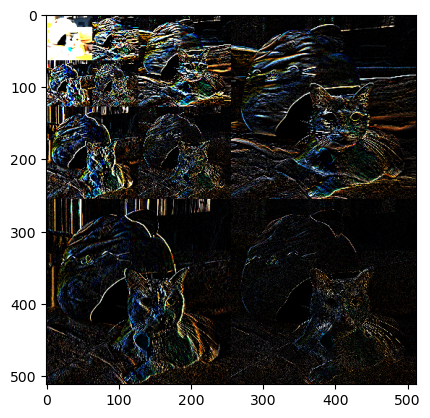

In [48]:
def multiple_wavelet(img, iterations):
    blur = img
    blocks = {}
    for curr_iter in range(iterations):
        cAs = np.zeros((blur.shape[0] //2, blur.shape[0] //2 , 3))
        cHs = np.zeros((blur.shape[0] //2, blur.shape[0] //2 , 3))
        cVs = np.zeros((blur.shape[0] //2, blur.shape[0] //2 , 3))
        cDs = np.zeros((blur.shape[0] //2, blur.shape[0] //2 , 3))
        for i in range(3):
            cA, (cH, cV, cD) = get_2d_wavelet_transform(blur[:, :, i])
            cAs[:, :, i] = cA
            cHs[:, :, i] = cH
            cVs[:, :, i] = cV
            cDs[:, :, i] = cD

        blocks[str(curr_iter)] = {}
        blocks[str(curr_iter)]['cHs'] = cHs
        blocks[str(curr_iter)]['cVs'] = cVs
        blocks[str(curr_iter)]['cDs'] = cDs
        blocks[str(curr_iter)]['cAs'] = cAs
        
        blur = cAs
    blocks['blur'] = blur
    blocks['iterations'] = iterations
    return blocks

img_path = "target-image.png"
img = np.array(ps.read_image(img_path))

blocks = multiple_wavelet(img, 3)

# do the beautiful reconstruction thingy

wavelet_domain_img = np.zeros(img.shape)
# wavelet_domain_img[img.shape[0] // 2**2: 2*img.shape[0] // 2**2, img.shape[0] // 2**2: 2*img.shape[0] // 2**2, : ] = blocks['1']['cAs']

for i in range(blocks['iterations']):

    wavelet_domain_img[img.shape[0] // 2**(i + 1): 2*img.shape[0] // 2**(i + 1), img.shape[0] // 2**(i + 1): 2*img.shape[0] // 2**(i + 1), : ] = blocks[str(i)]['cDs'] * 10

    wavelet_domain_img[: img.shape[0] // 2**(i + 1), img.shape[0] // 2**(i + 1): 2*img.shape[0] // 2**(i + 1), : ] = blocks[str(i)]['cHs']* 10
    
    wavelet_domain_img[img.shape[0] // 2**(i + 1): 2*img.shape[0] // 2**(i + 1), 0: img.shape[0] // 2**(i + 1), : ] = blocks[str(i)]['cVs']* 10
wavelet_domain_img[:img.shape[0] // 2**(i + 1), :img.shape[0] // 2**(i + 1), : ] = blocks['blur']
plt.imshow(wavelet_domain_img)
plt.show()

In [42]:
blocks['0']['cHs'].shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


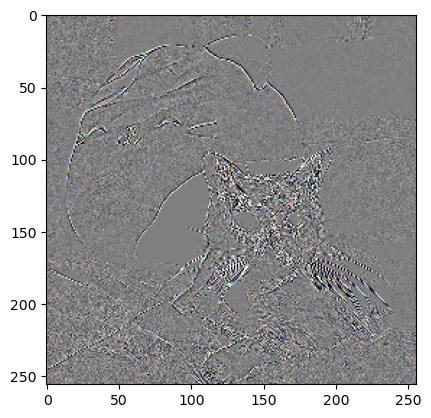

In [34]:
plt.imshow((blocks['0']['cDs']+.05) * 10)

In [21]:
blocks['0']['cDs'].shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256)
(256, 256)
(256, 256)


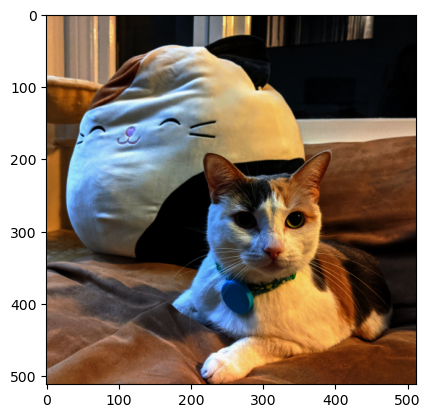

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


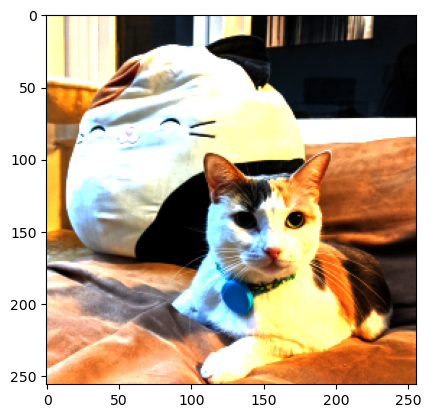

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


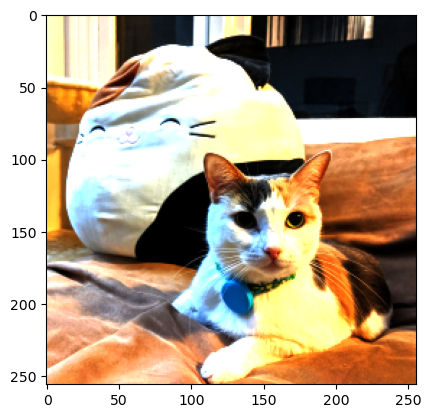

In [ ]:
img_path = "target-image.png"
img = np.array(ps.read_image(img_path))

cAs = np.zeros((img.shape[0] //2, img.shape[0] //2 , 3))
cHs = np.zeros((img.shape[0] //2, img.shape[0] //2 , 3))
cVs = np.zeros((img.shape[0] //2, img.shape[0] //2 , 3))
cDs = np.zeros((img.shape[0] //2, img.shape[0] //2 , 3))

for i in range(3):
    cA, (cH, cV, cD) = get_2d_wavelet_transform(img[:, :, i])
    cAs[:, :, i] = cA
    cHs[:, :, i] = cH
    cVs[:, :, i] = cV
    cDs[:, :, i] = cD

reconstructed_img = np.zeros(img.shape)
for i in range(3):
    reconstructed_img[:, :, i] = get_inv_wavelet_transform(cAs[:, :, i], cHs[:, :, i], cVs[:, :, i], cDs[:, :, i])

plt.imshow(reconstructed_img)
plt.show()


cA, (cH, cV, cD) =pywt.dwt2(img, 'haar', axes=(0,1))
plt.imshow(cA)
plt.show()
plt.imshow(cAs)
plt.show()


In [ ]:
cnt = 0
for i in range(512):
    for j in range(512):
        for k in range(3):
            cnt += 1

In [ ]:
zodie = np.array([[1,3], [2, 3]])
print(zodie, '\n')

H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
# norm_factor = np.linalg.norm(H, axis=1)
# print(norm_factor)


# multiplying zodie by transpose gives
# har wavelets in terms f 
print(H @ zodie)

print(pywt.dwt(zodie, 'db1', axis=0))


[[1 3]
 [2 3]] 

[[ 2.121  4.243]
 [-0.707  0.   ]]
(array([[2.121, 4.243]]), array([[-0.707,  0.   ]]))


In [ ]:
# doing it ourselves

zodie = np.array([[1,3], [2, 3]])

H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
# axis zero
# print(H @ zodie)
row_cA, row_cD = H @ zodie
print(row_cA, row_cD)

col_cA, col_cD = H @ row_cA.T 
print(col_cA, col_cD)


col_cA, col_cD = H @ row_cD.T 
print(col_cA, col_cD)

# LL, (cDh, cd)
print(pywt.dwt2(zodie, 'db1'))


[2.121 4.243] [-0.707  0.   ]
4.499999999999999 -1.4999999999999998
-0.4999999999999999 -0.4999999999999999
(array([[4.5]]), (array([[-0.5]]), array([[-1.5]]), array([[-0.5]])))


In [ ]:
# zodie = np.array([[151, 123], [566, 122]])




row_cA, row_cD = pywt.dwt(zodie, 'db1', axis=0)
# downsample, keep even index cols
# brodie = np.row_stack([row_cA, row_cD])
print(row_cA, row_cD,'\n')

col_cA, col_cD = pywt.dwt(row_cA, 'db1', axis=1)
# brodie = np.column_stack([row_cA, col_cD])[::2, :]
print(col_cA, col_cD)

print("yooooo\n\n")
cols_cA, cols_cD = pywt.dwt(row_cD, 'db1', axis=1)
print(cols_cA, cols_cD)


print(pywt.dwt2(zodie, 'db1'))



[[2.121 4.243]] [[-0.707  0.   ]] 

[[4.5]] [[-1.5]]
yooooo


[[-0.5]] [[-0.5]]
(array([[4.5]]), (array([[-0.5]]), array([[-1.5]]), array([[-0.5]])))


In [ ]:
print(pywt.dwt(np.array([1,3,3,4]).T, 'db1'))

H = [.5, .5, .5, .5, .5, .5, -.5, -.5, np.sqrt(2)/2, -np.sqrt(2)/2, 0, 0, 0, 0, np.sqrt(2)/2, -np.sqrt(2)/2]
H = np.reshape(H, (4,4))
row_norms = np.linalg.norm(H, axis=1, keepdims=True)

H = H / row_norms

print(H)
print(H @ np.array([1, 2, 3, 4]))


(array([2.828, 4.95 ]), array([-1.414, -0.707]))
[[ 0.5    0.5    0.5    0.5  ]
 [ 0.5    0.5   -0.5   -0.5  ]
 [ 0.707 -0.707  0.     0.   ]
 [ 0.     0.     0.707 -0.707]]
[ 5.    -2.    -0.707 -0.707]


In [ ]:
print(row_norms)

[[1.]
 [1.]
 [1.]
 [1.]]
